In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

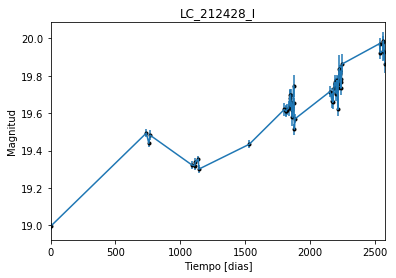

In [2]:
data = np.genfromtxt('LC_212428_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_212428_I')
plt.savefig("LC_212428_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

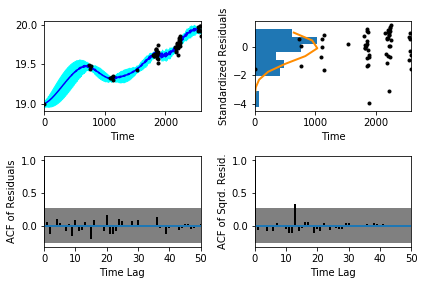

In [5]:
sample.assess_fit()

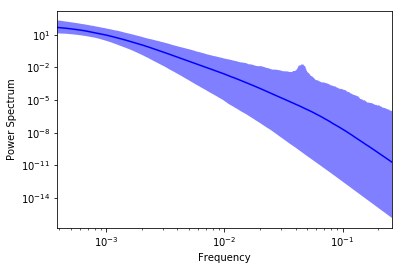

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

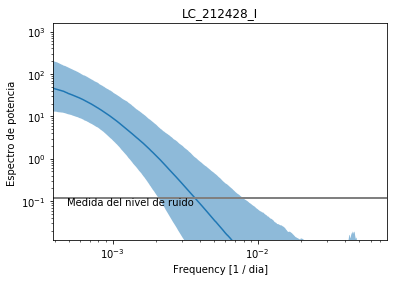

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_212428_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_212428_I')

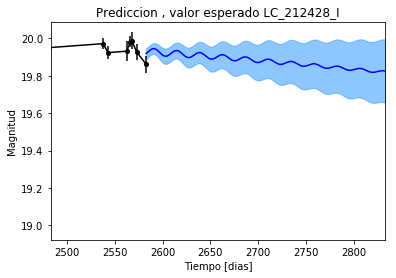

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_212428_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_212428_I')

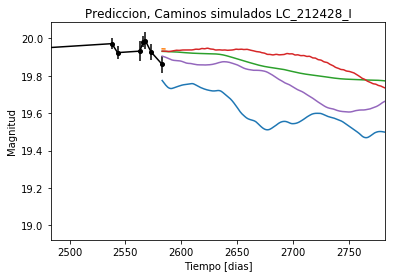

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_212428_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


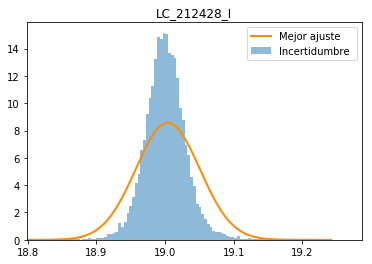

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_212428_I')
plt.savefig("Mejor_ajuste_LC_212428_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_212428_I')

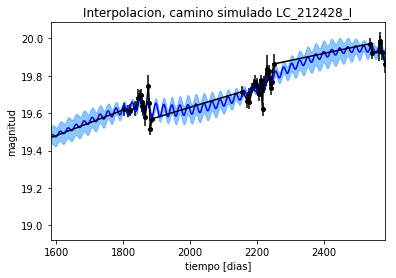

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_212428_I')

Text(0.5,1,'Interpolacion, camino simulado  LC_212428_I')

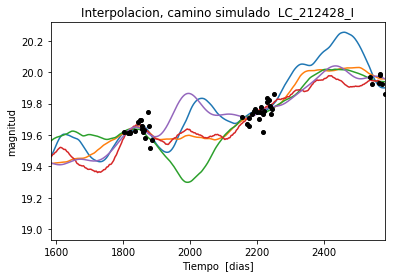

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_212428_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 989.941143751
Median: 0.00741370663184
Standard deviation: 0.101438097285
68% credibility interval: [ 0.00069534  0.12369355]
95% credibility interval: [ 0.0004233   0.38792243]
99% credibility interval: [  3.93541749e-04   5.00461771e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 658.373113954
Median: 0.000951134999326
Standard deviation: 0.042551403567
68% credibility interval: [ 0.00047718  0.00954503]
95% credibility interval: [ 0.00039887  0.13927378]
99% credibility interval: [ 0.00038939  0.31705485]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 392.784645417
Median: 0.00450076567654
Standard deviation: 0.11756

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 259.899380431
Median: 95.7004521329
Standard deviation: 2.00128401504
68% credibility interval: [ 93.80896477  96.84276967]
95% credibility interval: [  91.33492059  101.34280681]
99% credibility interval: [  89.44881186  101.97345908]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 233.800125862
Median: 0.339128046002
Standard deviation: 1.09805462201
68% credibility interval: [ 0.02670595  1.98707047]
95% credibility interval: [ 0.01227402  3.70138067]
99% credibility interval: [ 0.01065305  4.83427987]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 403.260365312
Median: 0.090493529548
Standard deviation: 2.06520134754
68% credibility interval: [ 0.00758903  1.52582381]
95% credibility interval: [  8.31806775e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12022.2188209
Median: 1.3620210946e-28
Standard deviation: 5.66411198333e+102
68% credibility interval: [  1.74207328e-61   5.60619884e-07]
95% credibility interval: [  4.98504487e-100   5.91398947e+001]
99% credibility interval: [  8.86717528e-111   3.42842227e+076]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1918.05120393
Median: 19.4704789191
Standard deviation: 0.177616424906
68% credibility interval: [ 19.31800931  19.61149695]
95% credibility interval: [ 19.09186348  19.81873802]
99% credibility interval: [ 18.81001486  20.05104261]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 324.103849803
Median: 0.0007216767801
Standard deviation: 0.11162647063
68% credibility interval: [ 0.          0.11848616]
95% credibility interval: [ 0.          0.43043265]
99% credibility interval: [ 0.          0.50156778]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 324.103849803
Median: 0.0007216767801
Standard deviation: 0.11162647063
68% credibility interval: [ 0.          0.11848616]
95% credibility interval: [ 0.          0.43043265]
99% credibility interval: [ 0.          0.50156778]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 604.568604864
Median: 0.0
Standard deviation: 0.000257008852192
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 259.899380431
Median: 95.7004521329
Standard deviation: 2.00128401504
68% credibility interval: [ 93.80896477  96.84276967]
95% credibility interval: [  91.33492059  101.34280681]
99% credibility interval: [  89.44881186  101.97345908]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1178.2152098
Median: 0.0932642817587
Standard deviation: 0.0980487652403
68% credibility interval: [ 0.05382708  0.169791  ]
95% credibility interval: [ 0.03393997  0.38211196]
99% credibility interval: [ 0.02655354  0.61675122]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 527.102193277
Median: 1.32393935684
Standard deviation: 0.218173479787
68% credibility interval: [ 1.12140782  1.5449484 ]
95% credibility interval: [ 0.90675708  1.78475886]
99% credibility interval: [ 0.81321057  1.9087479 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 307.216281156
Median: 1.91888206496e-05
Standard deviation: 0.022542379797
68% credibility interval: [  9.60037419e-07   4.38952027e-04]
95% credibility interval: [  1.78613470e-08   4.29725377e-03]
99% credibility interval: [  4.00994855e-81   4.60897074e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 989.941143751
Median: (-0.0465816925809+0j)
Standard deviation: 0.947702579877
68% credibility interval: [-0.77718949-1.04919226j -0.00436897-0.28642177j]
95% credibility interval: [-2.43738852+0.j        -0.00265970-2.2468684j]
99% credibility interval: [ -3.14449404e+00+0.j        -2.47269574e-03-1.126626j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 658.373113954
Median: (-0.00597615745291+0j)
Standard deviation: 0.750599817387
68% credibility interval: [-0.05997322+0.28208708j -0.00299823+0.j        ]
95% credibility interval: [-0.87508295+1.41814603j -0.00250618+0.01151571j]
99% credibility interval: [-1.99211436+2.90627008j -0.00244663+0.j        ]
Posterior summary for parameter ar_roots  element 2
---------